just a try make the model and see the output without any training 

In [1]:
from PIL import Image
import numpy as np


In [2]:
im = Image.open("image.jpg")
image = np.array(im)

In [83]:
image.shape

(228, 221, 3)

In [4]:
from skimage.transform import rescale, resize

In [5]:
image_r = resize(image, (28,28,3))

In [6]:
image_r.shape

(28, 28, 3)

In [7]:
import matplotlib.pyplot as plt

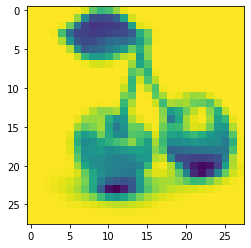

In [8]:
plt.imshow(image_r[:,:,0])

<hr>

In [9]:
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model

In [104]:
input_img = Input(shape = (28, 28, 3))

In [129]:
# x = Conv2D(8, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((3, 3), padding='same')(input_img)
# x = MaxPooling2D((2, 2), padding='same')(x)
# x = UpSampling2D((2, 2))(input_img)
# x = Conv2D(3, (3, 3), activation='relu', padding='same')(x)

model = Model(input_img, x)
model.summary()

Model: "model_52"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 28, 28, 3)]       0         
_________________________________________________________________
max_pooling2d_34 (MaxPooling (None, 10, 10, 3)         0         
Total params: 0
Trainable params: 0
Non-trainable params: 0
_________________________________________________________________


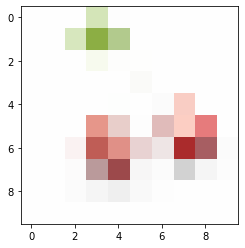

In [130]:
predict_img = model.predict(np.array([image_r]))
plt.imshow(predict_img[0])

In [21]:
predict_img.shape

(1, 2800, 2800, 3)

In [125]:
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [126]:
autoencoder.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 28, 28, 3)]       0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 28, 28, 16)        448       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 4, 4, 8)           0  

In [130]:
predict_img = autoencoder.predict(np.array([image_r]))

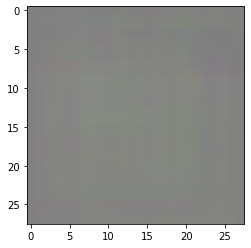

In [132]:
plt.imshow(predict_img[0])